In [21]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import Transformation
import DataCleaning
import ErrorVis
import numpy as np
import statsmodels.tools as stools

In [2]:
allData = DataCleaning.getShibaData()

/Users/shivasaravanan/CryptoDataFull/DataCleaning.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modTrends["DayTime"] = pd.to_datetime(modTrends["Day"])


(0.0, 8.400000000000001e-05)

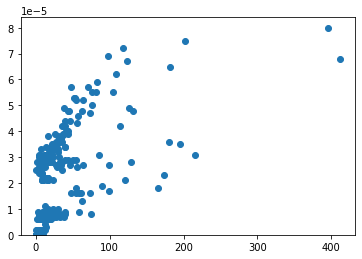

In [3]:
plt.scatter(allData["one"], allData["Close"])
plt.ylim(ymin=0)

(0.0, 8.400000000000001e-05)

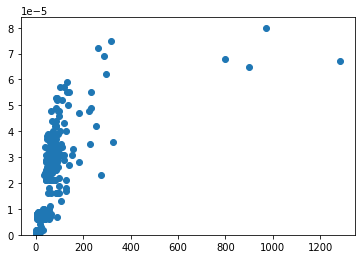

In [4]:
plt.scatter(allData["tweet_count"], allData["Close"])
plt.ylim(ymin=0)

(0.0, 8.400000000000001e-05)

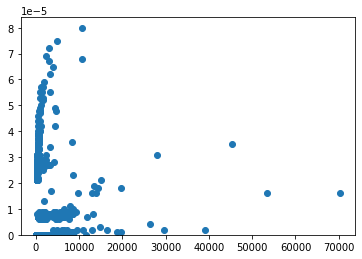

In [5]:
plt.scatter(allData["tx_count"], allData["Close"])
plt.ylim(ymin=0)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing as prep
import statsmodels.api as sm

In [7]:
X = sm.add_constant(allData[["standardized_txs", "standardized_posts", "standardized_tweets", "standardized_trends"]])
Y = allData["standardized_price"]
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     standardized_price   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     195.6
Date:                Tue, 17 May 2022   Prob (F-statistic):          1.63e-105
Time:                        14:57:11   Log-Likelihood:                -568.76
No. Observations:                 576   AIC:                             1148.
Df Residuals:                     571   BIC:                             1169.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -5.243e-16    

(-1.0325377723145954, 2.0)

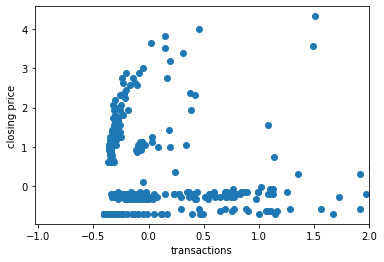

In [8]:
plt.scatter(allData["standardized_txs"], allData["standardized_price"])
plt.xlabel("transactions")
plt.ylabel("closing price")
plt.xlim(right=2)

(-0.9633032377925763, 2.0)

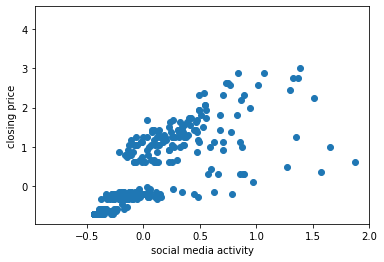

In [9]:
plt.scatter(allData["standardized_social"], allData["standardized_price"])
plt.xlabel("social media activity")
plt.ylabel("closing price")
plt.xlim(right=2)

In [10]:
allData["txnsSq"] = allData["standardized_txs"]*allData["standardized_txs"]
allData["smSq"] = allData["standardized_social"]*allData["standardized_social"]
allData["trendSq"] = allData["standardized_trends"]*allData["standardized_trends"]
allData["postsSq"] = allData["standardized_posts"]*allData["standardized_posts"]
allData["twtSq"] = allData["standardized_tweets"]*allData["standardized_tweets"]
XQuadratic = sm.add_constant(allData[["standardized_txs", "standardized_tweets", "standardized_posts", "standardized_trends","txnsSq", "twtSq", "postsSq", "trendSq"]])

modelQuadratic = sm.OLS(Y, XQuadratic).fit()
print(modelQuadratic.summary())

                            OLS Regression Results                            
Dep. Variable:     standardized_price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     318.3
Date:                Tue, 17 May 2022   Prob (F-statistic):          4.35e-204
Time:                        14:57:11   Log-Likelihood:                -326.82
No. Observations:                 576   AIC:                             671.6
Df Residuals:                     567   BIC:                             710.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1647    

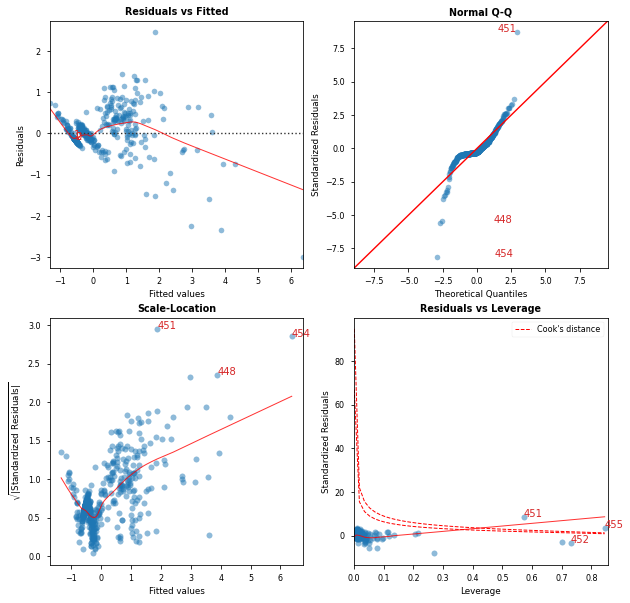

              Features  VIF Factor
0                const        1.22
5               txnsSq        3.90
1     standardized_txs        4.92
6                twtSq       14.79
2  standardized_tweets       30.32
3   standardized_posts       40.43
4  standardized_trends       65.56
7              postsSq       94.15
8              trendSq      114.39


(<Figure size 720x720 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>]],
       dtype=object))

In [11]:
quadDiagnostics = ErrorVis.Linear_Reg_Diagnostic(modelQuadratic)
quadDiagnostics()

                               OLS Regression Results                               
Dep. Variable:     standardized_smoothPrice   R-squared:                       0.622
Model:                                  OLS   Adj. R-squared:                  0.619
Method:                       Least Squares   F-statistic:                     234.7
Date:                      Tue, 17 May 2022   Prob (F-statistic):          4.85e-119
Time:                              14:57:13   Log-Likelihood:                -537.26
No. Observations:                       576   AIC:                             1085.
Df Residuals:                           571   BIC:                             1106.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

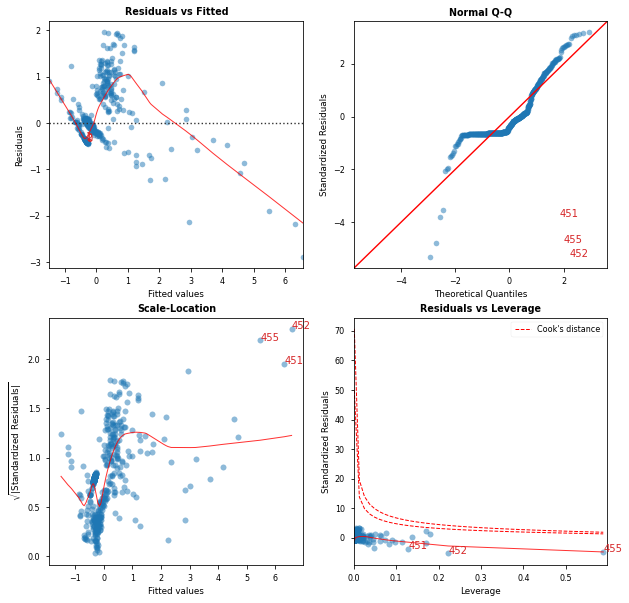

                    Features  VIF Factor
0                      const        1.00
1      standardized_smoothTx        1.52
3     standardized_smoothTwt        4.01
2    standardized_smoothPost       34.29
4  standardized_smoothTrends       38.77


(<Figure size 720x720 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>]],
       dtype=object))

In [12]:
allData["smoothedClosingPrice"] = allData["Close"].sort_index(ascending=False).ewm(span=2).mean().sort_index(ascending=True)
allData["smoothedTrends"] = allData["Shiba"].ewm(span=2).mean()
allData["smoothedPosts"] = allData["one"].ewm(span=2).mean()
allData["smoothedTxs"] = allData["tx_count"].ewm(span=2).mean()
allData["smoothedTweets"] = allData["tweet_count"].ewm(span=2).mean()
allData[["standardized_smoothTx", "standardized_smoothTwt", "standardized_smoothPost", "standardized_smoothTrends"]] = prep.StandardScaler().fit_transform(allData[['smoothedTxs', 'smoothedTweets', 'smoothedPosts', "smoothedTrends"]])
allData["standardized_smoothPrice"] = prep.StandardScaler().fit_transform(allData[["smoothedClosingPrice"]])
X = sm.add_constant(allData[["standardized_smoothTx", "standardized_smoothPost", "standardized_smoothTwt", "standardized_smoothTrends"]])
Y = allData["standardized_smoothPrice"]

modelSmoothed = sm.OLS(Y, X).fit()
print(modelSmoothed.summary())
smoothedDiagnostics = ErrorVis.Linear_Reg_Diagnostic(modelSmoothed)
smoothedDiagnostics()

                               OLS Regression Results                               
Dep. Variable:     standardized_smoothPrice   R-squared:                       0.826
Model:                                  OLS   Adj. R-squared:                  0.823
Method:                       Least Squares   F-statistic:                     69.34
Date:                      Tue, 17 May 2022   Prob (F-statistic):           4.71e-79
Time:                              14:57:55   Log-Likelihood:                -314.35
No. Observations:                       576   AIC:                             646.7
Df Residuals:                           567   BIC:                             685.9
Df Model:                                 8                                         
Covariance Type:                        HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

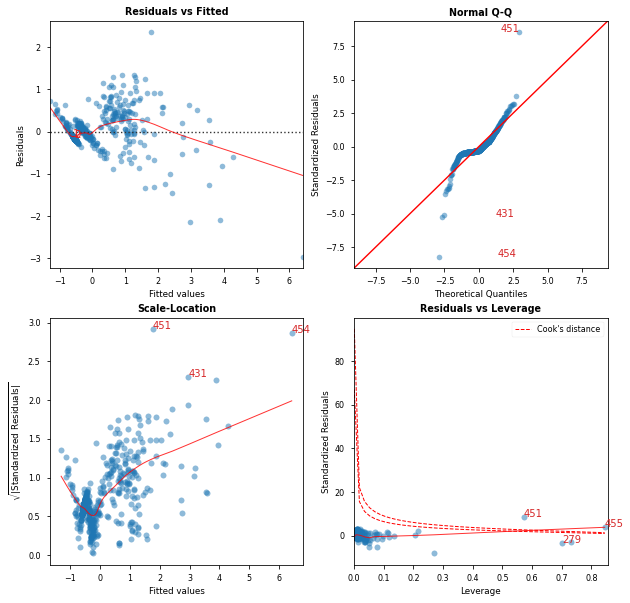

              Features  VIF Factor
0                const        1.22
5               txnsSq        3.90
1     standardized_txs        4.92
6                twtSq       14.79
2  standardized_tweets       30.32
3   standardized_posts       40.43
4  standardized_trends       65.56
7              postsSq       94.15
8              trendSq      114.39


(<Figure size 720x720 with 4 Axes>,
 array([[<AxesSubplot:title={'center':'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>,
         <AxesSubplot:title={'center':'Normal Q-Q'}, xlabel='Theoretical Quantiles', ylabel='Standardized Residuals'>],
        [<AxesSubplot:title={'center':'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>,
         <AxesSubplot:title={'center':'Residuals vs Leverage'}, xlabel='Leverage', ylabel='Standardized Residuals'>]],
       dtype=object))

In [16]:
YSmooth = allData["standardized_smoothPrice"]
modelQuad = sm.OLS(YSmooth, XQuadratic).fit(cov_type='HC3')
print(modelQuad.summary())
smoothedQuadDiagnostics = ErrorVis.Linear_Reg_Diagnostic(modelQuad)
smoothedQuadDiagnostics()

                               OLS Regression Results                               
Dep. Variable:     standardized_smoothPrice   R-squared:                       0.827
Model:                                  OLS   Adj. R-squared:                  0.824
Method:                       Least Squares   F-statistic:                     56.87
Date:                      Tue, 17 May 2022   Prob (F-statistic):           7.72e-67
Time:                              15:01:36   Log-Likelihood:                -296.61
No. Observations:                       548   AIC:                             611.2
Df Residuals:                           539   BIC:                             650.0
Df Model:                                 8                                         
Covariance Type:                        HC3                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

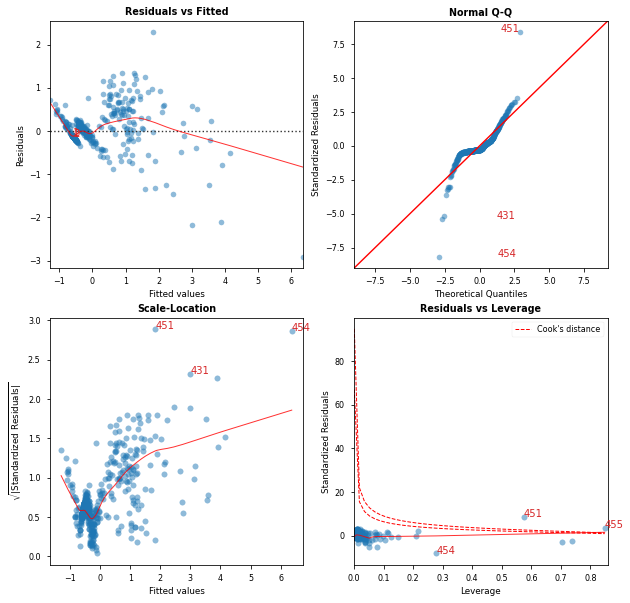

              Features  VIF Factor
0                const        1.27
5               txnsSq        3.91
1     standardized_txs        4.93
6                twtSq       16.72
2  standardized_tweets       34.37
3   standardized_posts       47.62
4  standardized_trends       70.30
7              postsSq       98.44
8              trendSq      117.97
0.2197784076132626


In [23]:
YSmooth = allData["standardized_smoothPrice"]
modelQuadTrain = sm.OLS(YSmooth[0:548], XQuadratic[0:548]).fit(cov_type='HC3')
print(modelQuadTrain.summary())
smoothedQuadDiagnostics = ErrorVis.Linear_Reg_Diagnostic(modelQuadTrain)
smoothedQuadDiagnostics()
XNewTest = XQuadratic[548:]
YPredTest = modelQuadTrain.predict(XNewTest)
YTestReal = YSmooth[548:]
print(stools.eval_measures.mse(YPredTest, YTestReal))

In [ ]:
tranX = sm.add_constant(Transformation.repeated_gs_removal(["standardized_posts", "standardized_tweets", "standardized_trends", 
                                   "standardized_trendSq", "standardized_postsSq", "standardized_tweetsSq"], 
                                   ["standardized_txs", "standardized_txSq"], allData))
idx = pd.date_range('2020-08-02', '2022-02-28')
XQuadSmoothNoTx = tranX
XQuadSmoothNoTx.index = idx

In [ ]:
modelQuadSmoothedNoTx = sm.OLS(YSmooth, XQuadSmoothNoTx).fit()
print(modelQuadSmoothedNoTx.summary())
smoothedQuadDiagnosticsNoTx = ErrorVis.Linear_Reg_Diagnostic(modelQuadSmoothedNoTx)
smoothedQuadDiagnosticsNoTx()

In [ ]:
trendX = sm.add_constant(Transformation.repeated_gs_removal(["standardized_posts", "standardized_tweets", "standardized_txSq", 
                                   "standardized_txs", "standardized_postsSq", "standardized_tweetsSq"], 
                                   ["standardized_trends", "standardized_trendSq"], allData))
idx = pd.date_range('2020-08-02', '2022-02-28')
XQuadSmoothNoTrend = trendX
XQuadSmoothNoTrend.index = idx
Y = allData["standardized_price"]

In [ ]:
modelQuadSmoothedNoTrend = sm.OLS(YSmooth, XQuadSmoothNoTrend).fit()
print(modelQuadSmoothedNoTrend.summary())
smoothedQuadDiagnosticsNoTrend = ErrorVis.Linear_Reg_Diagnostic(modelQuadSmoothedNoTrend)
smoothedQuadDiagnosticsNoTrend()

In [ ]:
postX = sm.add_constant(Transformation.repeated_gs_removal(["standardized_trends", "standardized_tweets", "standardized_txSq", 
                                   "standardized_txs", "standardized_trendSq", "standardized_tweetsSq"], 
                                   ["standardized_posts", "standardized_postsSq"], allData))
idx = pd.date_range('2020-08-02', '2022-02-28')
XQuadSmoothNoPost = postX
XQuadSmoothNoPost.index = idx

In [ ]:
modelQuadSmoothedNoPost = sm.OLS(YSmooth, XQuadSmoothNoPost).fit()
print(modelQuadSmoothedNoPost.summary())
smoothedQuadDiagnosticsNoPost = ErrorVis.Linear_Reg_Diagnostic(modelQuadSmoothedNoPost)
smoothedQuadDiagnosticsNoPost()

In [ ]:
twtX = sm.add_constant(Transformation.repeated_gs_removal(["standardized_trends", "standardized_posts", "standardized_txSq", 
                                   "standardized_txs", "standardized_trendSq", "standardized_postsSq"], 
                                   ["standardized_tweets", "standardized_tweetsSq"], allData))
idx = pd.date_range('2020-08-02', '2022-02-28')
XQuadSmoothNoTwt = twtX
XQuadSmoothNoTwt.index = idx

In [ ]:
modelQuadSmoothedNoTwt = sm.OLS(YSmooth, XQuadSmoothNoTwt).fit()
print(modelQuadSmoothedNoTwt.summary())
smoothedQuadDiagnosticsNoTwt = ErrorVis.Linear_Reg_Diagnostic(modelQuadSmoothedNoTwt)
smoothedQuadDiagnosticsNoTwt()

In [ ]:
influence = modelQuadSmoothed.get_influence()
inf_sum = influence.summary_frame()
inf_sum
xQuadLowLeverage = XQuadSmooth[np.abs(inf_sum["hat_diag"]) > (20/576)]
xQuadNoOutliers = xQuadLowLeverage[np.abs(inf_sum["student_resid"]) > 2.5]
xQuadRemoveBad = XQuadSmooth.loc[set(XQuadSmooth.index) - set(xQuadNoOutliers.index)].sort_index()
YSmoothRemoveBad = YSmooth.loc[set(YSmooth.index) - set(xQuadNoOutliers.index)].sort_index()
modelQuadSmoothedNoOutliers = sm.OLS(YSmoothRemoveBad, xQuadRemoveBad).fit(cov_type='HC3')
print(modelQuadSmoothedNoOutliers.summary())
noOutliersDiag = ErrorVis.Linear_Reg_Diagnostic(modelQuadSmoothedNoOutliers)
noOutliersDiag()

In [ ]:
XOutlierSmoothNoTwt = sm.add_constant(xQuadRemoveBad[["standardized_smoothPost", "standardized_smoothTx", "standardized_smoothTrends", "smoothTrendSq", "smoothPostsSq", "smoothTxnsSq"]])
modelOutlierSmoothedNoTwt = sm.OLS(YSmoothRemoveBad, XOutlierSmoothNoTwt).fit()
print(modelOutlierSmoothedNoTwt.summary())
smoothedOutlierDiagnosticsNoTwt = Linear_Reg_Diagnostic(modelOutlierSmoothedNoTwt)
smoothedOutlierDiagnosticsNoTwt()